In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
clean_x = pd.read_csv('cleaned_X.csv')
clean_y = pd.read_csv('cleaned_Y.csv')


In [39]:
clean_y

,Unnamed: 0,y_yes
0,0,0
1,1,0
2,2,0
3,3,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [3]:
clean_x.drop('Unnamed: 0', axis=1, inplace=True)
clean_x.head()

,age,balance,duration,campaign,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
0,58,2143,261,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,44,29,151,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,33,2,76,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,47,1506,92,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,35,231,139,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [4]:
len(clean_x.columns)

22

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
ss = StandardScaler()

In [7]:
feat = clean_x.loc[:, :]

In [8]:
feat_scaled = ss.fit_transform(feat)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


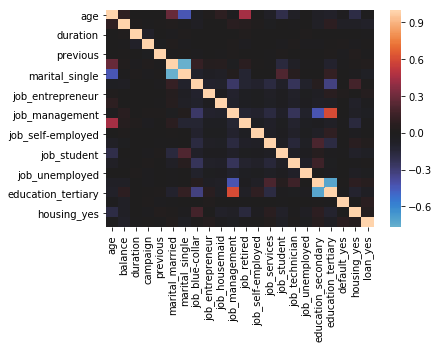

In [9]:
feat = clean_x.loc[:, :]
sns.heatmap(feat.corr(), center=0);

In [1]:
pca_1 = PCA(n_components=7)
pca_2 = PCA(n_components=15)
pca_3 = PCA(n_components=22)

principalComponents1 = pca_1.fit_transform(feat_scaled)
principalComponents2 = pca_2.fit_transform(feat_scaled)
principalComponents3 = pca_3.fit_transform(feat_scaled)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

pca = PCA(n_components=14)
principalComponents = pca.fit_transform(feat_scaled)
print(np.sum(pca.explained_variance_ratio_))

NameError: name 'PCA' is not defined

In [11]:
principalComponents = pd.DataFrame(principalComponents)
type(principalComponents)
principalComponents.shape


(44923, 14)

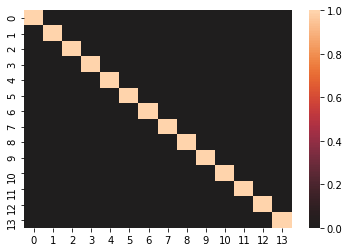

In [12]:
sns.heatmap(pd.DataFrame(principalComponents).corr(), center=0);

In [13]:
x = clean_x.iloc [:,:]
#cleaned_data_x
y = clean_y.iloc [:,:]
#cleaned_data_y

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [14]:
x.head()

,age,balance,duration,campaign,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
0,58,2143,261,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,44,29,151,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,33,2,76,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,47,1506,92,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,35,231,139,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [15]:
# scaler = StandardScaler()
# scaler.fit(x_train)

# X_scaled_train = scaler.transform(x_train)
# X_scaled_test = scaler.transform(x_test)

# KNN with straight variables

In [16]:
# Run KNN
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
y_pred = clf.predict(x_test)

In [18]:
y_pred.shape

(17970, 2)

In [19]:
y_pred2 = pd.DataFrame(y_pred[:,1])
y_pred2.head()

,0
0,0
1,0
2,0
3,0
4,0


In [20]:
y_test = y_test.y_yes
y_test.head()

28790    1
39262    0
41566    0
23326    0
29365    0
Name: y_yes, dtype: int64

In [21]:
print(type(y_pred2))
print(type(y_test))
print(y_pred2.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(17970, 1)
(17970,)


In [22]:
y_pred2.head()

,0
0,0
1,0
2,0
3,0
4,0


In [23]:
confusion_matrix(y_test, y_pred2)

array([[15333,   534],
       [ 1644,   459]])

In [35]:
clean_y['y_yes']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
44893    0
44894    0
44895    1
44896    0
44897    0
44898    1
44899    1
44900    1
44901    0
44902    1
44903    1
44904    1
44905    1
44906    0
44907    1
44908    1
44909    1
44910    0
44911    0
44912    1
44913    1
44914    1
44915    1
44916    1
44917    1
44918    1
44919    1
44920    1
44921    0
44922    0
Name: y_yes, Length: 44923, dtype: int64

In [2]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(clf, clean_x, clean_y['y_yes'], cv=5)

scores = cross_val_score(clf, clean_x, clean_y['y_yes'], cv=10, scoring='accuracy')
print('Cross Validaiton Scores', scores)
print('Cross Validation Mean:', sum(scores)/10)

NameError: name 'clf' is not defined

In [27]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
acc = accuracy_score(y_test, y_pred2)
print("Accuracy: ", acc)

[[15333   534]
 [ 1644   459]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     15867
           1       0.46      0.22      0.30      2103

   micro avg       0.88      0.88      0.88     17970
   macro avg       0.68      0.59      0.62     17970
weighted avg       0.85      0.88      0.86     17970

Accuracy:  0.8787979966611018


# KNN with PCA

In [39]:
scaler = StandardScaler()
scaler.fit(x_train)

X_scaled_train = scaler.transform(x_train)
X_scaled_test = scaler.transform(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [42]:
n_components = 14
pca = PCA(n_components=n_components)
pca.fit(X_scaled_train)
X_pca = pca.transform(X_scaled_train)

In [44]:
pca = PCA(n_components=n_components)
pca.fit(X_scaled_test)
X_test_pca = pca.transform(X_scaled_test)

In [46]:
X_train_pca_df = pd.DataFrame(X_pca)

X_train_pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14']
X_train_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.340935,-2.334896,1.012553,0.506670,0.048056,-0.203691,-0.006305,-0.183121,-0.195859,-0.126701,0.219839,-0.371303,0.134815,-0.050300
1,-1.062085,0.953888,-1.610388,0.976875,-1.151209,-0.263658,-0.423148,0.668060,0.392895,-0.090779,-0.673215,-0.131138,0.437761,-0.010274
2,0.712655,0.916662,-0.032013,-2.590182,-1.091180,0.190870,0.770701,-0.183602,-0.242056,-0.215342,0.603395,-0.114749,-1.095548,-0.703281
3,0.070750,-1.905424,1.908744,0.745741,-0.024861,-0.844723,-1.258717,-1.656211,-3.536485,-2.074504,-2.536307,1.873758,0.567951,-1.267091
4,-0.800259,-1.279771,0.490545,-1.308668,-0.892802,1.523059,0.287425,-0.042449,-0.143281,0.032816,0.233204,-0.054538,0.241550,0.137662


In [47]:
X_test_pca_df = pd.DataFrame(X_test_pca)
X_test_pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14']
X_test_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-1.223528,1.009052,1.389124,0.618427,-0.198939,0.324490,1.813075,0.886632,-5.011299,1.645434,-0.155366,-1.443247,0.466139,0.638895
1,-0.432314,-2.128500,0.072159,1.481549,0.157408,-0.981755,-0.386653,-0.083972,0.149253,0.362346,0.186821,-0.068672,-0.718624,-0.390627
2,-0.514682,3.098451,3.959129,1.223511,-1.425555,-1.684251,0.067504,-0.996710,1.114200,0.292876,0.603287,-1.385561,-1.006941,-0.495911
3,2.389651,1.339359,-1.267141,-1.018369,-0.189701,-0.531029,-2.903672,-0.366673,-0.817621,0.473234,0.120260,0.422419,-0.111141,3.323344
4,2.575832,-1.169443,0.490164,0.257029,-0.351445,-0.396916,0.048602,0.451279,-0.713891,-1.847796,4.790200,0.775252,0.476228,-0.970260


In [54]:
model = KNeighborsClassifier()
model.fit(X_train_pca_df, y_train)
y_pred_pca = model.predict(X_test_pca_df)
y_pred_pca = pd.DataFrame(y_pred_pca[:,1])
print(confusion_matrix(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))
acc = accuracy_score(y_test, y_pred_pca)
print("Accuracy: ", acc)

[[15185   682]
 [ 1818   285]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     15867
           1       0.29      0.14      0.19      2103

   micro avg       0.86      0.86      0.86     17970
   macro avg       0.59      0.55      0.55     17970
weighted avg       0.82      0.86      0.84     17970

Accuracy:  0.860879243183083
